In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.cross_decomposition import PLSRegression

In [3]:
import csv
import matplotlib.pyplot as plt

In [4]:
from scipy import stats

import sklearn
from sklearn import linear_model
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import random
from random import shuffle

ImportError: No module named discriminant_analysis

In [10]:
import math
import numpy as np

In [11]:
df_ON_OF = pd.read_csv("ON_OF.txt", sep='\t')

In [12]:
df_YN_ON = pd.read_csv("YN_ON.txt", sep='\t')

In [13]:
df_YF_OF = pd.read_csv("YF_OF.txt", sep='\t')

In [14]:
df_YN_YF = pd.read_csv("YN_YF.txt", sep='\t')

In [15]:
df_ON = df_ON_OF[[19,4,6,7,8,9]];

In [16]:
df_OF = df_ON_OF[[19,4,10,11,12,13]]

In [17]:
df_YN = df_YN_ON[[19,4,6,7,8,9]]

In [18]:
df_YF = df_YN_YF[[19,4,10,11,12,13]]

In [19]:
def drop_dup(d):
    d = d.drop_duplicates(subset='gene', keep='first')
    return d

def merge(d1, d2):
    return pd.merge(d1, d2, how='outer', on=['gene','width'])

def merge2(d1, d2):
    return pd.merge(d1, d2, how='outer', on='gene')

In [20]:
dft = merge(df_ON, df_OF)

In [21]:
dft = merge(dft, df_YN)

In [22]:
dft = merge(dft, df_YF)

In [23]:
dft = drop_dup(dft)

In [24]:
dft.dropna(thresh=(2), axis=0);

In [25]:
dft = dft[pd.notnull(dft).all(axis=1)]

In [26]:
df = dft

In [27]:
state_dict = {'AT2.young.flu.20150416': 'YF', 'AT2.old.naive.20150416': 'ON', 
                 'AT2.old.flu.20150416': 'OF', 'AT2.young.naive.20150416': 'YN'}

In [28]:
def rename_cols(df, state_dict):
    cols = df.columns
    temp_cols = list(cols)
    #print temp_cols
    for c in range(len(cols)):
        state_name = cols[c][:-2]
        #sample_num = cols[c][-2:]
        total_name = cols[c]
        #print state_name
        if state_name in state_dict:
            new_state_name = state_dict[state_name]
            new_col = total_name.replace(state_name, new_state_name)
            temp_cols[c] = new_col
            #print abb_pair_dict[state_name]
    df.columns = temp_cols
    #print temp_cols
    return df

In [29]:
def log_trans(X):
    for row in range(len(X)):
        for v in crange(len(X[row])):
            X[row][v] = np.log(X[row][v] + 1)
    return X

In [30]:
df = rename_cols(df, state_dict)

In [36]:
df

,gene,width,ON.1,ON.2,ON.3,ON.4,OF.1,OF.2,OF.3,OF.4,YN.1,YN.2,YN.3,YN.4,YF.1,YF.2,YF.3,YF.4
0,Gnai3,38867,3.416110,3.009893,2.985305,3.308861,3.006839,3.288298,3.362613,3.246345,4.314209,3.823944,3.258348,3.601572,3.543772,3.432298,4.055527,3.608435
1,Cdc45,31541,0.097670,0.040609,0.069904,0.074135,0.073475,0.023836,0.033416,0.060919,0.076083,0.077795,0.014816,0.027971,0.119195,0.051267,0.045765,0.101058
3,Narf,18604,0.894176,0.757337,0.607386,0.843899,0.480479,0.444518,0.439068,0.533623,1.160905,1.262395,0.627976,0.758754,0.716473,0.709824,0.403462,0.471166
4,Cav2,7931,10.409801,10.497557,11.710880,10.361103,9.809717,9.479280,9.501984,7.389288,13.010706,12.463725,12.373726,12.236357,9.609895,9.650530,9.464138,9.293965
5,Klf6,8905,47.013339,41.137221,44.567283,45.876615,42.642833,48.403478,62.760002,57.323654,32.573386,35.545164,48.489444,39.298792,60.372131,51.358070,61.563981,43.355790
6,Scmh1,124906,0.268831,0.266620,0.266987,0.288828,0.323365,0.325023,0.320654,0.328175,0.254562,0.305893,0.269376,0.263694,0.383077,0.364640,0.328202,0.322178
7,Cox5a,11193,4.265999,3.509320,3.594959,3.849834,4.200088,4.276307,4.449298,4.606370,3.805504,3.726723,2.922542,3.652031,3.603107,3.515338,4.178344,4.591985
8,Tbx2,9398,0.983380,1.362911,1.700905,1.244032,1.479553,0.879955,1.205617,0.885967,2.713025,0.895164,2.386794,2.253011,2.000179,1.691910,1.290178,2.289368
9,Tbx4,29676,0.114189,0.215808,0.204317,0.090050,0.211965,0.177336,0.106550,0.097122,0.454860,0.212615,0.236208,0.237833,0.483711,0.172548,0.301573,0.362506
10,Ngfr,18918,0.032568,0.090275,0.058274,0.070629,0.105001,0.066233,0.097499,0.186207,0.206129,0.037058,0.123511,0.202085,0.126463,0.028492,0.076301,0.252734


In [38]:
X = log_trans(np.array(dft.ix[:,2:])).transpose()

explained variance ratio (first two components): [ 0.51617942  0.14048143  0.06620258]


/home/tjyacoub/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


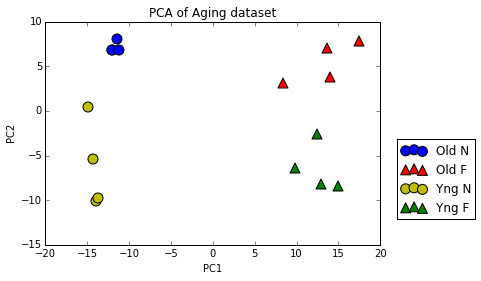

In [39]:
y = np.array([0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3])

y = y[:len(X)]
n = int(len(X)/4)
target_names = ['Old N','Old F','Yng N','Yng F'][:n]

pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

colors = "bryg"[:n]
symbols = "o^o^"[:n]

plt.figure()
plt.axes(ylabel='PC2', xlabel = 'PC1')
for c, i, target_name, mark in zip(colors, [0, 1, 2, 3][:n], target_names, symbols):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, marker=mark, s=100, label=target_name)

plt.legend(bbox_to_anchor=(1.3,0.5))

plt.title('PCA of Aging dataset')


plt.show()

In [167]:
#pca = PCA(n_components=3)
#X_r = pca.fit(X).transform(X)

pc1 = abs(pca.components_[0])
pc1_ind = np.argsort(pc1)

pc2 = abs(pca.components_[1])
pc2_ind = np.argsort(pc2)

AttributeError: 'PCA' object has no attribute 'components_'

In [149]:
sel_ind = list(set(pc1_ind[:100]) | set(pc2_ind[:100]))

In [231]:
sel_ind = list(sel_ind)

In [302]:
dft = df.ix[sel_ind,range(2,10)]
dft = dft[pd.notnull(dft).all(axis=1)]
X = log_trans(np.array(dft)).transpose()


In [303]:
len(X)

8

In [ ]:
for i in range(2):
    

In [ ]:
def iter_pca(df, selects):
    
    dft = df.ix[selects, range(2,10)]
    dft = dft[pd.notnull(dft).all(axis=1)]
    X = log_trans(np.array(dft)).transpose()
    y = np.array([0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3])

    y = y[:len(X)]
    n = int(len(X)/4)
    
    pca = PCA(n_components=3)
    X_r = pca.fit(X).transform(X)
    
    pc1 = abs(pca.components_[0])
    pc1_ind = np.argsort(pc1)

    pc2 = abs(pca.components_[1])
    pc2_ind = np.argsort(pc2)
    
    sel_ind = list(set(pc1_ind[:100]) | set(pc2_ind[:100]))

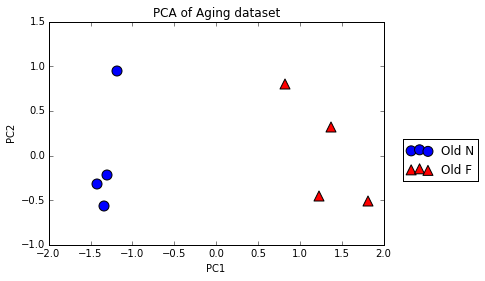

In [304]:

#X = stats.zscore(X, axis=1)

def plot_pca(X_r, n)

    target_names = ['Old N','Old F','Yng N','Yng F'][:n]


    colors = "bryg"[:n]
    symbols = "o^o^"[:n]

    plt.figure()
    plt.axes(ylabel='PC2', xlabel = 'PC1')
    for c, i, target_name, mark in zip(colors, [0, 1, 2, 3][:n], target_names, symbols):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, marker=mark, s=100, label=target_name)

    plt.legend(bbox_to_anchor=(1.3,0.5))

    plt.title('PCA of Aging dataset')


    plt.show()



sel_ind = list(set(pc1_ind[:100]) | set(pc2_ind[:100]))

In [305]:
pca.components_

array([[ -1.72762686e-02,  -5.25586197e-02,   2.03460711e-02,
          2.04753169e-03,  -1.85801674e-02,   2.17266773e-02,
          1.04644419e-02,   8.03784884e-03,  -4.63863795e-02,
         -1.05713258e-02,   3.01712534e-02,   1.94177741e-02,
         -4.57609086e-02,   5.26771972e-04,  -5.54332200e-03,
         -1.89359371e-02,  -2.04157094e-01,  -4.63458889e-02,
          7.56341771e-02,  -4.29590211e-02,  -4.76475606e-02,
         -1.01532523e-02,  -4.92287931e-02,   2.38163895e-04,
         -1.99760486e-03,   5.89137146e-02,   8.81659327e-03,
         -4.00439189e-02,   4.20006621e-02,  -1.73310136e-02,
          3.55819972e-02,   1.13763593e-02,   2.21557721e-02,
         -1.12356901e-02,  -6.05826038e-02,  -1.37758080e-01,
         -3.83847829e-02,   3.91757079e-02,   3.52380687e-02,
          5.70772387e-02,   4.90291668e-02,   3.91944936e-01,
         -1.12076140e-02,  -1.73802543e-02,  -1.99326710e-02,
          5.51057959e-03,  -5.09187063e-03,  -1.17059064e-03,
        